In [1]:
import networkx as nx
import pandas as pd
import numpy as np

import country_converter as coco

import umap
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
files_path = '//domino/datasets/jaime_oliver/industry_network/scratch/'
year=2015

In [30]:
network_path = f'{files_path}{year}/A_country.graphml'
G = nx.readwrite.graphml.read_graphml(network_path)


AxisError: axis 1 is out of bounds for array of dimension 1

In [12]:
np.square(g/g.sum(axis=1)).sum(axis=1)    

array([0.84614874, 0.80256266, 0.55216005, 0.46057702, 0.47627613,
       0.80715755, 0.75733277, 0.63965808, 0.56838926, 0.68618621,
       0.84709525, 0.74851697, 0.63895691, 0.44305875, 0.48008915,
       0.63133714, 0.49897042, 0.66766017, 0.43852158, 0.59009995,
       0.65978535, 0.71161745, 0.57664791, 0.46652696, 0.57379101,
       0.29969165, 0.74315567, 0.70050976, 0.25669809, 0.56991356,
       0.56848631, 0.68822764, 0.78162849, 0.73837629, 0.38426642,
       0.61182177, 0.39674096, 0.27260653, 0.6288914 , 0.47660768,
       0.53272107, 0.23393684, 0.53155959, 0.51121487, 0.65287598,
       0.75515049, 0.7404964 , 0.66271227, 0.59787145, 0.56903993,
       0.63486273, 0.74247203, 0.79348428, 0.5656159 , 0.43075024,
       0.41764111, 0.44945   , 0.61448164, 0.53199821, 0.51954106,
       0.74866441, 0.53223457, 0.81596983, 0.48772448, 0.67284794])

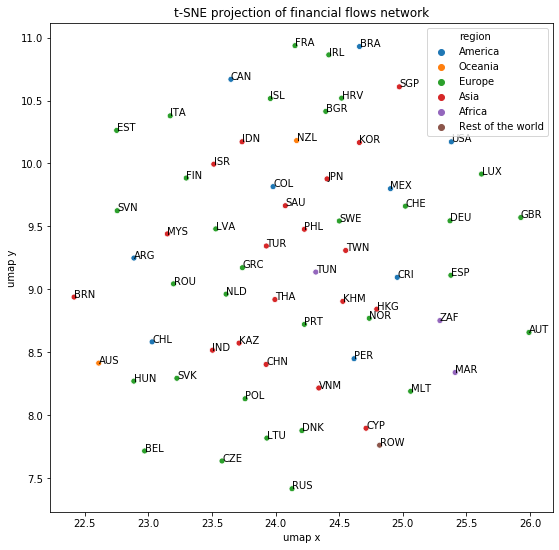

In [3]:
def plot_umap(graph):

    g = nx.linalg.graphmatrix.adjacency_matrix(graph).toarray()

    reducer = umap.UMAP(n_components=2)
    embedding = reducer.fit_transform(g)

    names = list(G.nodes)
    regions = {c:coco.convert(c, to='Continent') for c in names}
    regions['ROW'] = 'Rest of the world'
    
    df_plot = pd.DataFrame({'umap x':embedding[:, 0], 'umap y':embedding[:, 1], 'country':names, })
    df_plot['region'] = df_plot.country.map(regions)
    
    fig, ax = plt.subplots(figsize=(9,9))
    sns.scatterplot(data=df_plot, x='umap x', y='umap y', hue = 'region', ax=ax)

    for i, txt in enumerate(names):
        ax.annotate(txt, (embedding[:, 0][i], embedding[:, 1][i]))
    
    
network_path = f'{files_path}{year}/A_country.graphml'
G = nx.readwrite.graphml.read_graphml(network_path)

plot_umap(G)
plt.title('t-SNE projection of financial flows network')
plt.show()

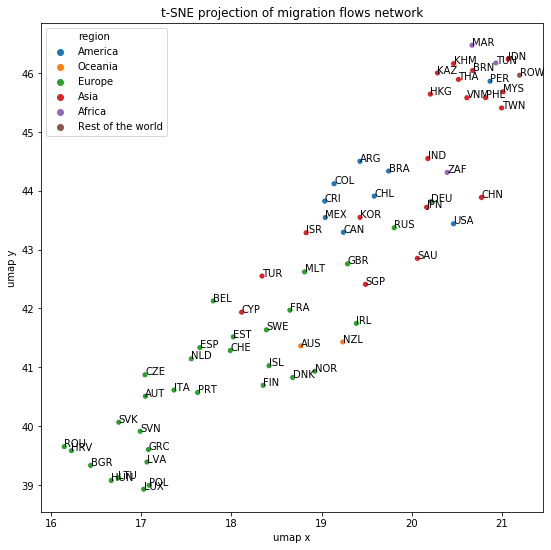

In [4]:
network_path = f'{files_path}{year}/migration_network.graphml'
G = nx.readwrite.graphml.read_graphml(network_path)
plot_umap(G)
plt.title('t-SNE projection of migration flows network')
plt.show()

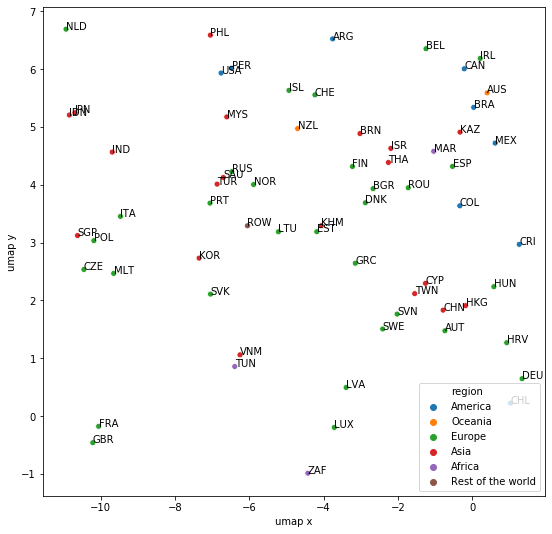

In [5]:
network_path = f'{files_path}{year}/migration_network.graphml'
G = nx.readwrite.graphml.read_graphml(network_path)
g = nx.linalg.graphmatrix.adjacency_matrix(G).toarray()

reducer = umap.UMAP(n_components=1)
embedding_1 = reducer.fit_transform(g)

network_path = f'{files_path}{year}/A_country.graphml'
G = nx.readwrite.graphml.read_graphml(network_path)
g = nx.linalg.graphmatrix.adjacency_matrix(G).toarray()

reducer = umap.UMAP(n_components=1)
embedding_2 = reducer.fit_transform(g)

names = list(G.nodes)
regions = {c:coco.convert(c, to='Continent') for c in names}
regions['ROW'] = 'Rest of the world'


df_plot = pd.DataFrame({'umap x':embedding_1[:,0], 'umap y':embedding_2[:,0], 'country':names})
df_plot['region'] = df_plot.country.map(regions)

fig, ax = plt.subplots(figsize=(9,9))
sns.scatterplot(data=df_plot, x='umap x', y='umap y', hue = 'region', ax=ax)

for i, txt in enumerate(names):
    ax.annotate(txt, (embedding_1[:, 0][i], embedding_2[:, 0][i]))

plt.show()
